## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [0]:
# importing neccesary libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
student_data = pd.read_csv('/content/drive/My Drive/Datasets/students-data.csv', sep=';')

student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [0]:
# checking info of the dataset
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [0]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [0]:
student_data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No null values observed

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [0]:
student_data.select_dtypes(exclude='int64').columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [0]:
# Checking columns that have variance less than 1
student_data.var() < 1

age           False
Medu          False
Fedu          False
traveltime     True
studytime      True
failures       True
famrel         True
freetime       True
goout         False
Dalc           True
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [0]:
# dropping the column having less than 1
columns_to_drop = []

for column_name in student_data.columns:
  if (student_data[column_name].dtypes == 'int64'):
    if (student_data[column_name].var() < 1):
      columns_to_drop.append(column_name)
      
student_data_new = student_data.drop(columns=columns_to_drop, axis=1, inplace=False)
student_data_new.var()

age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
Walc         1.658678
health       1.932944
absences    64.049541
G1          11.017053
G2          14.148917
G3          20.989616
dtype: float64

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [0]:
label_encoder = LabelEncoder()

for column_name in student_data_new.select_dtypes(exclude='int64').columns:
  #print(column_name)
  label_encoder.fit(student_data_new[column_name])
  student_data_new[column_name] = label_encoder.transform(student_data_new[column_name])
  # printing the encoded values and their original value
  print('For column: ', column_name)
  print(np.arange(len(student_data_new[column_name].unique())))
  print(label_encoder.inverse_transform(np.arange(len(student_data_new[column_name].unique()))))

For column:  school
[0 1]
['GP' 'MS']
For column:  sex
[0 1]
['F' 'M']
For column:  address
[0 1]
['R' 'U']
For column:  famsize
[0 1]
['GT3' 'LE3']
For column:  Pstatus
[0 1]
['A' 'T']
For column:  Mjob
[0 1 2 3 4]
['at_home' 'health' 'other' 'services' 'teacher']
For column:  Fjob
[0 1 2 3 4]
['at_home' 'health' 'other' 'services' 'teacher']
For column:  reason
[0 1 2 3]
['course' 'home' 'other' 'reputation']
For column:  guardian
[0 1 2]
['father' 'mother' 'other']
For column:  schoolsup
[0 1]
['no' 'yes']
For column:  famsup
[0 1]
['no' 'yes']
For column:  paid
[0 1]
['no' 'yes']
For column:  activities
[0 1]
['no' 'yes']
For column:  nursery
[0 1]
['no' 'yes']
For column:  higher
[0 1]
['no' 'yes']
For column:  internet
[0 1]
['no' 'yes']
For column:  romantic
[0 1]
['no' 'yes']


In [0]:
# checking dataframe 
student_data_new.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,1,0,0,0,1,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,0,1,0,0,0,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,0,1,1,1,1,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,0,1,1,0,1,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [0]:
grade_columns = student_data_new.columns[-3:]

for column_name in grade_columns:
  student_data_new[column_name] = np.where(student_data_new[column_name] > 10, 1, 0)

In [0]:
student_data_new.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,1,0,0,0,1,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,0,0,0,1,0,0,0,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0,2,3,3,10,0,0,0
3,0,0,15,1,0,1,4,2,1,3,1,1,0,1,1,1,1,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,1,0,0,1,1,0,1,1,0,0,2,2,5,4,0,0,0


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [0]:
X = student_data_new.drop('G3', axis=1, inplace=False)
y = student_data_new[['G3']]

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

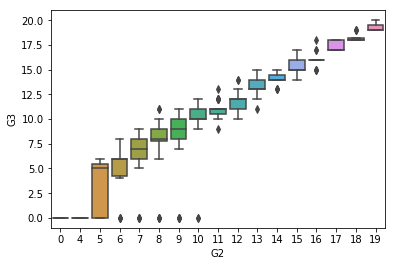

In [0]:
sns.boxplot(data=student_data, x='G2', y='G3')

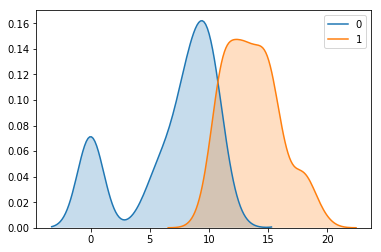

In [0]:
sns.kdeplot(student_data.loc[student_data["G2"] <= 10]["G3"], shade=True, label="0")
sns.kdeplot(student_data.loc[student_data["G2"] > 10]["G3"], shade=True, label="1")


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

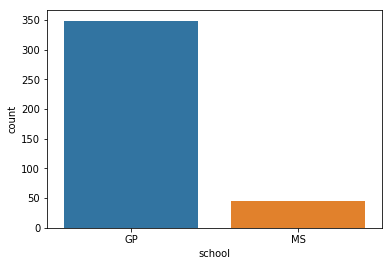

In [0]:
sns.countplot(data=student_data, x='school')

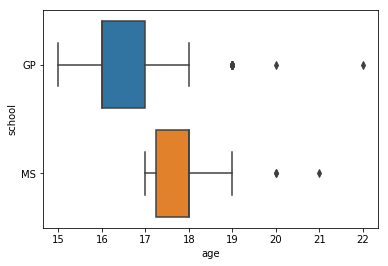

In [0]:
sns.boxplot(data=student_data, x='age', y='school')

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

# Naive bayes with Iris data

### Import Iris.csv

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

### Find the distribution of target variable (Class)

### Plot the distribution of target variable using histogram

In [0]:
pd.value_counts(iris["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

### Summary Statistics and explain insights for at least 2 variables

### Correlation among all variables and give your insights

### Split data in Training and Validation in 80:20

### Do Feature Scaling

### Train and Fit NaiveBayes Model

### Print Accuracy and Confusion Matrix and Conclude your findings